# ***Project***

---
Create a simple assistant that uses any LLM and should be pydantic, when we ask about any product it should give you two information product Name, product details tentative price in USD(integer). Use chat prompt template and chain system.

---

In [1]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import PydanticOutputParser
from IPython.display import Image, display
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from typing import Annotated, List
from pydantic import BaseModel, Field
load_dotenv()

True

In [2]:
groq_api_key  = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"]="Simple Chatbot"
os.environ["LANGCHAIN_TRACING_V2"] = "true"

model = ChatGroq(model_name="meta-llama/llama-4-scout-17b-16e-instruct", groq_api_key=groq_api_key)

## Product output schema

In [3]:
class ProductDetails(BaseModel):
    """This is product info Schema."""
    
    product_name: Annotated[str, Field(description="This is product name.")]
    product_details: Annotated[List[str], Field(description="List of product details like Ram, Rom, processor, Camera, battery, Screen size.")]
    product_price: Annotated[int, Field(description="Product prince in USD(integer format price).")]
    
parser = PydanticOutputParser(pydantic_object=ProductDetails)

## System messages and ChatPromptTemplate

In [4]:
system_messages = """
    Think you are a tech expert. Your task is user will give a phone name and you will be provide a Structured output based on the {format_instruction} schema.
    1. product name which user will be give you.
    2. product details like Ram, Rom, processor, Camera, battery, Screen size and other which is necessary.
    3. product tentative price in USD format. must in USD integer format.
"""

In [5]:
chat_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_messages),
        ("human", "{input}")
    ]
).partial(format_instruction=parser.get_format_instructions())

In [6]:
chain = chat_prompt | model | parser

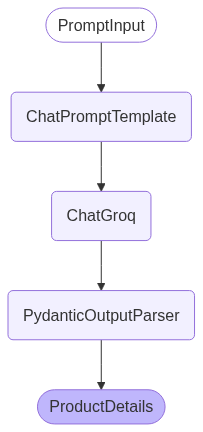

In [7]:
display(Image(chain.get_graph().draw_mermaid_png()))

In [8]:
response = chain.invoke(
    {
        "input": "Samsung s24 ultra"
    }
)
response

ProductDetails(product_name='Samsung S24 Ultra', product_details=['RAM: 12GB/16GB', 'ROM: 128GB/256GB/512GB/1TB', 'Processor: Qualcomm Snapdragon 8 Gen 3', 'Camera: 200MP primary sensor, 50MP front camera', 'Battery: 5000mAh', 'Screen Size: 6.8 inches Dynamic AMOLED 2X', 'Refresh Rate: 120Hz', 'Operating System: Android 14'], product_price=1199)

In [9]:
response.model_dump()

{'product_name': 'Samsung S24 Ultra',
 'product_details': ['RAM: 12GB/16GB',
  'ROM: 128GB/256GB/512GB/1TB',
  'Processor: Qualcomm Snapdragon 8 Gen 3',
  'Camera: 200MP primary sensor, 50MP front camera',
  'Battery: 5000mAh',
  'Screen Size: 6.8 inches Dynamic AMOLED 2X',
  'Refresh Rate: 120Hz',
  'Operating System: Android 14'],
 'product_price': 1199}

In [10]:
response.product_details

['RAM: 12GB/16GB',
 'ROM: 128GB/256GB/512GB/1TB',
 'Processor: Qualcomm Snapdragon 8 Gen 3',
 'Camera: 200MP primary sensor, 50MP front camera',
 'Battery: 5000mAh',
 'Screen Size: 6.8 inches Dynamic AMOLED 2X',
 'Refresh Rate: 120Hz',
 'Operating System: Android 14']

In [11]:
response.product_price

1199